# googlenet 平衡数据集

## Pretrain 

Accuracy: 75%


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets
from torchvision import transforms
from torchvision import models

# Define the transforms
trans = transforms.Compose([
    transforms.Resize(32),
    transforms.ToTensor(),
])
# print the location running 
import os
print(os.getcwd())
# Load the dataset
cifar_train = datasets.CIFAR10('/root/cifar', train=True, transform=trans,download=True)
cifar_test = datasets.CIFAR10('/root/cifar', train=False, transform=trans,download=True)




/root
Files already downloaded and verified
Files already downloaded and verified


In [4]:

# Define the data loaders
trainloader = torch.utils.data.DataLoader(cifar_train, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(cifar_test, batch_size=64, shuffle=False)

# Load the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model = models.googlenet(pretrained=True)
model = model.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Train the model
for epoch in range(10):
    running_loss = 0.0
    # print(f"epoch: {epoch}")
    for i, data in enumerate(trainloader, 0):
        # print(f"i: {i}")
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

# Evaluate the model
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

cuda
Accuracy of the network on the 10000 test images: 75 %


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the test data
testloader = torch.utils.data.DataLoader(cifar_test, batch_size=64, shuffle=False)

# Evaluate the model
y_true = []
y_pred = []
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        y_true += labels.tolist()
        y_pred += predicted.tolist()

# Compute the metrics
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average='macro')
rec = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print('Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1: {:.4f}'.format(acc, prec, rec, f1))

Accuracy: 0.7549, Precision: 0.7549, Recall: 0.7549, F1: 0.7544


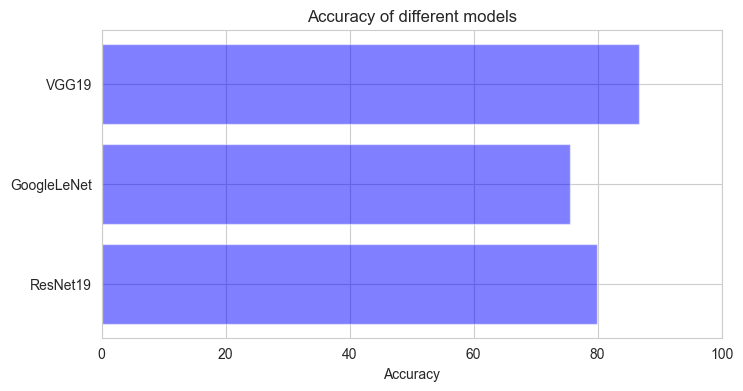

In [1]:


# 	ResNet19	GoogleLeNet	VGG19
# 准确率	79.86%	75.49%	86.71%
# 精确率	79.79%	75.49%	87.00%
# 召回率	79.86%	75.49%	86.71%
# F1	79.80%	75.44%	86.73%

render_data = {
    "ResNet19": {
        "Accuracy": 79.86,
        "Precision": 79.79,
        "Recall": 79.86,
        "F1": 79.80
    },
    "GoogleLeNet": {
        "Accuracy": 75.49,
        "Precision": 75.49,
        "Recall": 75.49,
        "F1": 75.44
    },
    "VGG19": {
        "Accuracy": 86.71,
        "Precision": 87.00,
        "Recall": 86.71,
        "F1": 86.73
    }
}

# draw a `barh` plot
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(list(render_data.keys()), [render_data[k]['Accuracy'] for k in render_data.keys()], color='b', alpha=0.5)
ax.set_xlim([0, 100])
ax.set_xlabel('Accuracy')
ax.set_title('Accuracy of different models')
plt.show()